<img src="images/TRU_Logo_Horizontal_RGB-colour37470.png" width=600 />
<!-- The line above is html code. This line is html comment, it won't affect the output -->

# Physics 2200 - Mechanics
## Project 3 - Integration in 2 and 3 Dimensions

In this project, we are going to solve the projectile motion numerically. We are going to do this for three cases: no air drag, linear air drag and quadratic air drag. We have solved the first two cases analytically in class, so you can compare your numerical results to these solutions to make sure you are on the right track before you tackle the quadratic case.

In a certain way, this is just the generalization of **Project 1** to two dimmensions. The main difference is that you know have to store two arrays for position, $x$ and $z$, and two for velocity, $v_x$ and $v_z$. You also need to calculate two components of the acceleration at every step. 

You should use the 2nd order Rung-Kutta (RK2) method throughout this project. Errors in the Euler method can quickly pile up in two dimmensions.

Interesting fact: for the case with no air drag, the RK2 method actually becomes exact! This has to do with the fact that it is a second order method and the selotion is a quadratic (parabola) polynomial.

In [1]:
import matplotlib.pyplot as plt
import PhysPlot
import numpy as np

# Problem 1: No air drag (1 point)
This is the simplest possible case: no air drag. You are going to code a numerical version of this so you get a first contact with integration in 2D with a well know problem. You should code an analytical function for this so you can compare to your numerical solution for the same initial conditions. Plot the trajectory ($z \times x$) graph for both the numerical and analytical solutions.


### Notice about ploting
Notice that even though you are calculating the trajectory for the same values of time $t$ in the numerical and analytical cases, they will not necessarily have the same exact values of $x$ due to numerical errors. 

Since we will be plotting $z \times x$ this time I needed to change the function *multiplot* so that it accepts a list for the horizontal axis as well as the vertical axis. Here is what the call to *multiplot* will look like if your numerical solution arrays are $x$ and $z$ and the analytical ones are $xa$ and $za$:

**PhysPlot.multiplot([x, xa], [z, za], ["Numerical", "Analytic"], "x", "z")**

I wrote out the an iteration of the rk2 which can be implimented in a for loop and acts on a acceleration function defined as a python function. This can be used for seperable (P1, P2) acceleration functions, or unseperable ones (P3) where the position and velocitiy are arrays, and the acceleration function acts on arrays.

In [2]:
# rk2 function that takes in the acceleration as a function in terms of position, velocity, and time.
# Uses it to compute one iteration of the rk2 method 

def rk2(afunc,xi,vi,ti,dt):
    a = afunc(vi,xi,ti)
    tt = ti + dt/2
    xt = xi + vi*dt/2
    vt = vi + a*dt/2
    at = afunc(vt,xt,tt)
    xf = xi + vt*dt
    vf = vi + at*dt
    
    return xf, vf
    

The seperated acceleration equations for the no drag case are:
$$a_x = 0$$
$$a_z = - g$$ 

The projectile travelled a range of 256.326 m in 7.25 s flight time


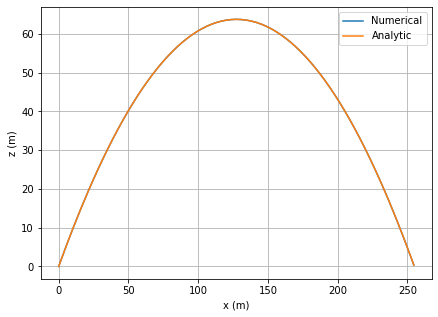

In [3]:
g = 9.807 # acceleration of gravity in m/s^2

alpha = 45 # launch angle in degrees
alpha = np.deg2rad(alpha) # convert launch angle to rad
v0 = 50 # launch speed in m/s
x0 = 0 # inital x
z0 = 0 # inital z
dt = 0.05 # time interval in s
tf = 10

# create arrays for position and velocity in x and z
t = np.arange(0,tf,dt)
x = np.zeros(len(t))
z = np.zeros(len(t))
vx = np.zeros(len(t))
vz = np.zeros(len(t))

# arrays for anylitical solution
xa = np.zeros(len(t))
za = np.zeros(len(t))

# get inital x and z velocity from launch speed and angle
vx0 = v0*np.cos(alpha)
vz0 = v0*np.sin(alpha)

# set inital conditions
x[0] = x0
z[0] = z0
vx[0] = vx0
vz[0] = vz0
xa[0] = x0
za[0] = z0

# define acceleration function with no drag (for z only)
def accNoDrag(v,x,t):
    return -g
    
# constant velocity for x
def constV(v,x,t):
    return 0
    
# numerical for loop
for i in range(len(t) -1):
    z[i + 1], vz[i + 1] = rk2(accNoDrag, z[i], vz[i], t[i], dt)
    x[i + 1], vx[i + 1] = rk2(constV, x[i], vx[i], t[i], dt)
    
    if z[i + 1] < 0:
        i = i + 1 # update i for getting flight time, range, and to use for plots
        flightime = t[i]
        flightrange = x[i]
        break
        
# compute anylitical solution
xa = vx0*t
za = vz0*t - 0.5*g*t**2

# pull loop variable from P1 to use for plotting the no drag case in p2
nodragstop = i

print("The projectile travelled a range of", round(flightrange, 3), "m in", round(flightime, 2), "s flight time")
PhysPlot.multiplot([x[0:i], xa[0:i]], [z[0:i], za[0:i]], ["Numerical", "Analytic"], "x (m)", "z (m)")

Here is what my plot looks like. The numerical solution is not visible because it is under the analytic one (as mentioned, for the no-drag case, the RK2 method yealds an exact solution).

<img src="images/p3_p1.jpg" width=500 style="float:leftt"/>

# Problem 2: Linear air drag (2 points)
Let's code the case of linear air drag now. Remember that the equation of motion now reads:

$$\ddot{\vec{r}} = -\gamma \dot{\vec{r}} - g\hat{k}$$
or alternativelly,
$$\vec{a} = -\gamma \vec{v}- g\hat{k}$$

This is a force of the sepparable type, so you should be able to write two independent equations of motion for $x$ and $z$ (takin the trajectory to lie on the $xz$ plane).

We have solved this problem analytically in class, the result is:

$x = \frac{\dot{x}_0}{\gamma}(1-e^{-\gamma t})$

$z = \left( \frac{\dot{z}_0}{\gamma} + \frac{g}{\gamma^2} \right)(1-e^{-\gamma t}) - \frac{g}{\gamma} t$

You should code an analytical function to compare to your numerical solution for the same initial conditions. Plot the trajectory ($z \times x$) graph for both the numerical and analytical solutions.

Recall that, even though we were able to find an analytic solution to the linear drag projectile motion, we could not obtain a simple expression for the *range* of the projectile. The *range* is the horizontal ($x$) distance covered by the projectile by the time it hits the ground on a horizontal surface. The following two questions are related to finding the *range* of the motion.

For the next two questions (A) and (B), adopt the following initial conditions:
$x_0 = 0$, $z_0 = 0$, $v_0 = 50 m/s$, $\theta_0 = 45^{\circ}$ (launch angle with respect to the horizontal)

### Question (A)
Adopt $\gamma = 0.2 s^{-1}$ and integrate the trajectory using the initial conditions given above. Create a plot showing three trajectories ($z \times x$): your numerical solution, the analytic solution for linear air drag (should match your numerical solution) and the analytic solution for no-drag. 

Find the value for the *range* of the motion, that is, the value of $x$ when the projectile hits the ground (assuming the lauch hapens on a flat ground).

Here is what my plot looks like:

<img src="images/p3_p2a.jpg" width=600 style="float:left"/>

By equating the components of the overall $\vec{a}$ to the drag and velocity components, the equations of motion seperate into:

$${a_x} = -\gamma {v_x},$$

$${a_z} = -\gamma {v_z}- g.$$

Which were implimented in seperate functions and used in the rk2 method which I wrote above problem 1.

The analytical solution was taken from the notes:
$$x = \frac{\dot{x_0}}{\gamma}(1 - e^{-\gamma t}),$$
$$z = \left(\frac{\dot{z_0}}{\gamma} + \frac{g}{\gamma^2}\right)(1 - e^{-\gamma t}).$$

The projectile travelled a range of 124.061 m in 6.05 s flight time


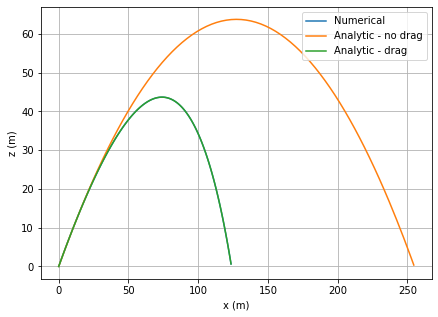

In [4]:
gamma = 0.2 # gamma in s^-1

alpha = 45 # launch angle in degrees
alpha = np.deg2rad(alpha) # convert launch angle to rad
v0 = 50 # launch speed in m/s
x0 = 0 # inital x
z0 = 0 # inital z
dt = 0.05 # time interval in s
tf = 10

# create arrays for position and velocity in x and z
t = np.arange(0,tf,dt)
x = np.zeros(len(t))
z = np.zeros(len(t))
vx = np.zeros(len(t))
vz = np.zeros(len(t))

# arrays for anylitical solutions
xalindrag = np.zeros(len(t))
zalindrag = np.zeros(len(t))

# get inital x and z velocity from launch speed and angle
vx0 = v0*np.cos(alpha)
vz0 = v0*np.sin(alpha)

# set inital conditions
x[0] = x0
z[0] = z0
vx[0] = vx0
vz[0] = vz0
xalindrag[0] = x0
zalindrag[0] = z0

# define acceleration function with no drag (for z only)
def zlindrag(v,x,t):
    return - gamma*v - g
    
# constant velocity for x
def xlindrag(v,x,t):
    return - gamma*v
    
# numerical for loop
for i in range(len(t) -1):
    z[i + 1], vz[i + 1] = rk2(zlindrag, z[i], vz[i], t[i], dt)
    x[i + 1], vx[i + 1] = rk2(xlindrag, x[i], vx[i], t[i], dt)
    
    if z[i + 1] < 0:
        i = i + 1 # update i for getting flight time, range, and to use for plots
        flightime = t[i]
        flightrange = x[i]
        break

#  analytical solution for linear drag, reuse analytical for no drag from P1
xalindrag = vx0/gamma*(1 - np.exp(- gamma*t))
zalindrag = (vz0/gamma + g/gamma**2)*(1 - np.exp(- gamma*t)) - g*t/gamma

print("The projectile travelled a range of", round(flightrange, 3), "m in", round(flightime, 2), "s flight time")
PhysPlot.multiplot([x[0:i], xa[0:nodragstop], xalindrag[0:i]], [z[0:i], za[0:nodragstop], zalindrag[0:i]], ["Numerical", "Analytic - no drag", "Analytic - drag"], "x (m)", "z (m)")

### Question (B)
In class we showed that the projectile with linear drag will reach a maximum $x$ distance even if allowed to fall for an infinitely long time (immagine the projectile is shot of the edge of a very tall cliff)). By increasing the total duration of your numerical integration ($t_f$), find what this maximum value, $x_{max}$, is. compare this to the analytic prediction $x_{max} = v_{x0} / \gamma$. Create a plot showing the $x$ position of the projectile as a function of time ($x \times t$) to show how it approaches $x_{max}$.

Here is what my plot looks like:

<img src="images/p3_p2b.jpg" width=600 style="float:left"/>

By taking the limit of the $x$ equation for the linear drag case as $t$ increases:
$$ \lim\limits_{t \rightarrow \infty} \left(\frac{\dot{x_0}}{\gamma}(1 - e^{-\gamma t}) \right).$$

We get as $t \rightarrow \infty$, $x \rightarrow \frac{\dot{x_0}}{\gamma}$, or
$$x_{max} = \frac{\dot{x_0}}{\gamma}.$$

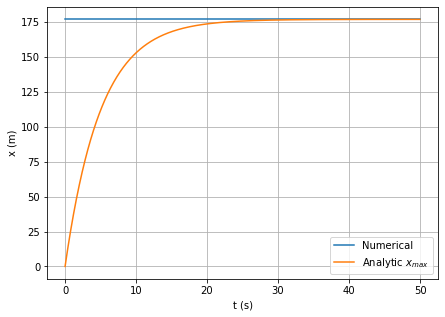

In [5]:
gamma = 0.2 # gamma in s^-1

alpha = 45 # launch angle in degrees
alpha = np.deg2rad(alpha) # convert launch angle to rad
v0 = 50 # launch speed in m/s
x0 = 0 # inital x
z0 = 0 # inital z
dt = 0.05 # time interval in s
tf = 50

# create arrays for position and velocity in x and z
t = np.arange(0,tf,dt)
x = np.zeros(len(t))
vx = np.zeros(len(t))

# get inital x velocity from launch speed and angle
vx0 = v0*np.cos(alpha)

# set inital conditions
x[0] = x0
vx[0] = vx0
    
# numerical for loop
for i in range(len(t) -1):
    x[i + 1], vx[i + 1] = rk2(xlindrag, x[i], vx[i], t[i], dt)

# calculate xmax
xmax = vx0/gamma

# graph
PhysPlot.multiplot([[0,tf], t], [[xmax,xmax], x], ["Numerical", "Analytic $x_{max}$", "Analytic - drag"], "t (s)", "x (m)")

# Problem 3: Example 4.3.2 (modified) - A "tape measure" home run (4 points).
The objective of this problem is to find how hard Mickey Mantle had to hit the baseball to achieve his historic 1953 home run that reportedly traveled 565 ft. This is equivalent to finding the initial speed $v_0$ whith which the baseball left his bat.

In Chapter 2 we saw that a baseball travelling at high speeds was better described by a quadratic air drag force. So this is what we will use for this home run example. We cannot calculate analytically the trajectory of a projectile with quadratic air drag, so a numerical solution is our only option here. The equation of motion for quadratic air drag is

$\vec{a} = -\gamma |v| \vec{v}- g\hat{k}$

where $|v|$ is the speed (magnitude of the velocity). This can be sepparated into:

$\ddot{x} = -\gamma (\dot{x}^2 + \dot{z}^2)^{1/2} \; \dot{x}$

$\ddot{z} = -\gamma (\dot{x}^2 + \dot{z}^2)^{1/2} \; \dot{z} - g$

For all questions below, use $\gamma = 0.0055 m^{-1}$ as suggested in the textbook example.

## Question (A)
Write a numerical solution for the trajectory using the RK2 method. Use the following initial conditions: $x_0 = 0$, $z_0 = 0$, $v_0 = 50 m/s$, $\theta_0 = 45^{\circ}$ (launch angle with respect to the horizontal). Create a plot showing two trajectories ($z \times x$): your numerical solution and the analytic solution for no-drag. 

Find the value for the *range* of the motion, that is, the value of $x$ when the projectile hits the ground (assuming the lauch hapens on a flat ground).

Here is what my plot looks like:

<img src="images/p3_p3a.jpg" width=600 style="float:left"/>

For this problem the rk2 method I implimented for problems 1 and 2 will work if it is fed position and velocity as arrays and uses an acceleration function that works on those arrays

In [6]:
d = 565/3.280839895 
print("The record home run travelled 565 ft or", round(d,3), "m.")

The record home run travelled 565 ft or 172.212 m.


The baseball travelled a range of 131.369 m in 5.9 s flight time


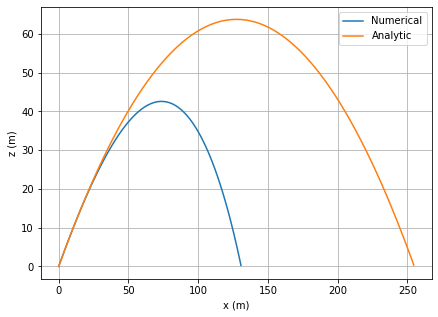

In [7]:
alpha = 45 # launch angle in degrees
alpha = np.deg2rad(alpha) # convert launch angle to rad
v0 = 50 # launch speed in m/s
x0 = 0 # inital x
z0 = 0 # inital z
dt = 0.05 # time interval in s
tf = 10
gamma = 0.0055

# create arrays for position and velocity in x and z
t = np.arange(0,tf,dt)
x = np.zeros((len(t),2))
v = np.zeros((len(t),2))

# arrays for anylitical solution
xa = np.zeros(len(t))
za = np.zeros(len(t))

# get inital x and z velocity from launch speed and angle
vx0 = v0*np.cos(alpha)
vz0 = v0*np.sin(alpha)

# set inital conditions
x[0,0] = x0
x[0,1] = z0
v[0,0] = vx0
v[0,1] = vz0

# define acceleration function with quadratic drag for 2 dimensions, used for all of P3
def accquaddrag(v,x,t):
    a = np.zeros(len(x))
    vmag = np.sqrt(v[0]**2 + v[1]**2) # get magnitude of v
    a[0] = - gamma*v[0]*vmag # x component
    a[1] = - gamma*v[1]*vmag - g # z component
    return a
    
# numerical for loop
for i in range(len(t) -1):
    x[i + 1,:], v[i + 1,:] = rk2(accquaddrag, x[i,:], v[i,:], t[i], dt)
    
    if x[i + 1,1] < 0:
        i = i + 1 # update i for getting flight time, range, and to use for plots
        flightime = t[i]
        flightrange = x[i,0]
        break
    
# compute analytical solution for no drag
xa = vx0*t
za = vz0*t - 0.5*g*t**2

print("The baseball travelled a range of", round(flightrange, 3), "m in", round(flightime, 2), "s flight time")
PhysPlot.multiplot([x[0:i,0], xa[0:nodragstop]], [x[0:i,1], za[0:nodragstop]], ["Numerical", "Analytic"], "x (m)", "z (m)")

## Question (B)
Let's assume that Mickey Mantle's hit left the bat at the optimal launch angle $\theta$, that is, the angle that gives maximum range. By using this angle we are reducing the astounding speed required to achieve his feat. 

For a projectile with quadratic air drag, the optimal angle is **not** $45^{\circ}$, of course. Nor is it easy to calculate analytically, so we will have to find a numerical solution. Here is how to do this: keeping the launch speed constant at $v_0 = 50 m/s$, vary the launch angle $\theta$ to find the angle for maximum *range* for the projectile. 

To do this, create and array of values for the angle $\theta$ and run the integration for each value of $\theta$ (using a **for** loop). Find the *range* for each value of $\theta$ and make a plot of the *range* vs. $\theta$ clearly showing the maximum for the *range*.

Here is what my plot looks like:

<img src="images/p3_p3b.jpg" width=600 style="float:left"/>

The baseball travelled maximum range of 132.344 m at 40.1 ° launch angle.


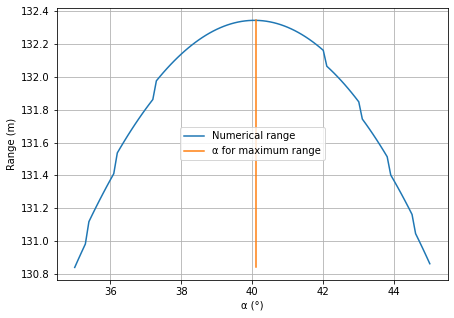

In [8]:
v0 = 50 # launch speed in m/s
x0 = 0 # inital x
z0 = 0 # inital z
dt = 0.005 # time interval in s, had to be reduced to eliminate jaggedness in plot of alpha against rnage
tf = 10
gamma = 0.0055

# test lanuch angles from 35 to 45 degrees in incriments of 0.1 degrees
alpha0 = np.radians(35)
alphaf = np.radians(45)
deltaalpha = np.radians(0.1)
alphas = np.arange(alpha0,alphaf,deltaalpha)

# flightrange array for holding the flight range
flightrange = np.zeros(len(alphas))

# create arrays for position and velocity in x and z
t = np.arange(0,tf,dt)
x = np.zeros((len(t),2))
v = np.zeros((len(t),2))

#set inital position
x[0,0] = x0
x[0,1] = z0

# arrays for anylitical solution
xa = np.zeros(len(t))
za = np.zeros(len(t))

for j in range(len(alphas)):
    # get inital x and z velocity from launch speed and angle
    vx0 = v0*np.cos(alphas[j])
    vz0 = v0*np.sin(alphas[j])

    # update inital velocity
    v[0,0] = vx0
    v[0,1] = vz0

    # numerical for loop
    for i in range(len(t) -1):
        x[i + 1,:], v[i + 1,:] = rk2(accquaddrag, x[i,:], v[i,:], t[i], dt)

        if x[i + 1,1] < 0:
            i = i + 1 # update i for getting flight time, range, and to use for plots
            flightrange[j] = x[i,0]
            break

# get angle for longest distance
bestrange = max(flightrange)
bestalpha = alphas[np.argmax(flightrange)]data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcYAAAE+CAYAAAAXo7BdAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/MnkTPAAAACXBIWXMAAAsTAAALEwEAmpwYAABLHklEQVR4nO3dd3iUVfbA8e9JIYGEJNRQAoZeEiBAQCkKqBQbuovYUEFE7G1dV7G76m9dcde+qyhYUdaOYgFUIqII0gmhQ4DQEkpIAqSf3x8z4IBpQCbvJHM+z5MnM3fecuYyzMl931tEVTHGGGOMS4DTARhjjDG+xBKjMcYY48ESozHGGOPBEqMxxhjjwRKjMcYY48ESozHGGOPBa4lRRKaISLqIJHuUPSEiK0RkmYjMEpFm7vLBIrJYRFa6f59dzrH/KiIqIg29Fb8xxhj/JN4axygiZwE5wDuqGu8ui1DVLPfjO4DOqnqTiHQHdqvqDhGJB2aqavNSjtsCeAPoCPRU1T3lxdKwYUONjY2tlPflKw4ePEhYWJjTYfgkq5vSWd2UzuqmdDW1bhYvXrxHVRsdXx7krROq6lwRiT2uLMvjaRig7vKlHuWrgFARCVHVvBIO/RzwN2B6RWOJjY1l0aJFFd28WkhKSmLgwIFOh+GTrG5KZ3VTOqub0tXUuhGRLSWVey0xlhHIU8C1wAFgUAmbjACWlpQURWQ4sF1Vl4uIdwM1xhjjl7x2KRXA3WKcceRS6nGvTQBCVfVRj7I44AtgiKpuPG77OsAc92sHRCQVSCztUqqIjAfGA0RHR/ecNm1a5bwpH5GTk0N4eLjTYfgkq5vSWd2UzuqmdDW1bgYNGrRYVROPL3cyMZ4GfOVx/zEG+AG4TlV/LmH7LsD3wCF3UQywA+itqrvKiiMxMVHtUqr/sLopndVN6axuSldT60ZESkyMVXopVUTaqep699PhwBp3eRTwFTChpKQIoKorgcYex0qljBajMcYYczK8OVzjA2A+0EFE0kTkeuBpEUkWkRXAEOBO9+a3AW2Bh91DOZaJSGP3cd4QkT9kdGOMMcYbvNkr9coSiieXsu2TwJOlvDaulPLYkw7OGGOMKYXNfGOMMcZ4sMRojDHGeLDEaIwxxnio8gH+xhjvKy5W9h3KJyM7j+zcQg7mFZKTV8iytAJ2/7YVVeie8k8CBNZ1f4jatQKoHRxEg/Ba1A+rRb06tQgMsEk0jH+yxGhMNVVQVMymjIOs2ZVF6p5DbNl7kNS9B9meeZg9OfkUFZcyRjl5JQDTai0G4NbVS/6wSYBAo7ohtKhXhxb1XT/to8Pp2KQusQ3CCAq0i02m5rLEaEw1oKps3XeIRan7WbRlPyu3Z7Judw75hcUAiEDTiFBOaxDGWe0a0TgihMZ1Q2kYHkJk7WDCQgIJDwli2eLf6Nu3DwI0+PglVGHmRWdxuKCIg3mF7DuYz96cPPYezGfngVy27TvEws37mL5sO0fybK3AADo0qUv3llGunxb1OK1BHWyaRlNTWGI0xkelZ+Xy0/o9/LQ+g5837iUj2zV9cN3QILrFRDGmbyydmtalU9MIYhuEERocWO4xt9cJoHlUbdeTQNf2HZrULXe/3IIiNqTnsG53Nmt3ZbNy+wE+WZzGO/NdczA3iQilX9uG9GvbgP7tGtK4buhJvmtjnGeJ0RgfoaqsT8/h2+RdfJu8i5SdrsVoGoTVon+7hvSKrU9ibD3aN65LQBXf/wsNDiS+eSTxzSOPlhUVK+vTs1m8ZT+/bNjLD2t288mSNAASWkQxuHM0gztH065xuLUmTbViidEYh6XuOchnS7fz5fIdbNpzEBHo2bIe9w3ryFntG9KpSUSVJ8KKCAwQOjaJoGOTCEadfhrFxUrKziyS1qYzO2U3E2euZeLMtbRrHM4l3ZszvFszWtSv43TYxpTLEqMxDsjJK2T6su18sjiNJVszEYE+rRswtn8rhnSOpnFE9bsUGRAgR1uVt53djl0Hcpmdsovpy3YcTZKJp9Xjit4tuaBLU2rXKv/SrzFOsMRoTBVavTOL937dwudLt3Mwv4gO0XW5/7yOXJzQjKaRtZ0Or1I1iQzlmj6xXNMnlm37DvHF8h18sjiNv360nMe/XMWfuzfnmj6n0bZx+fc4jalKlhiN8bLiYmXO2nQmzd3Egs37CAkK4MKuzbj6jJYktIjyi/tvLerX4dZBbbllYBsWbN7HBwu38sHCbbw9fwuDOjRi3Jmt6dumgV/UhfF9lhiN8ZL8wmI+W5rGpLmb2JhxkGaRoTxwfkcuS2xBVJ1aTofnCBHhjNYNOKN1Ax65MI+pC7byzvxURr2xgI5N6nLb2W05L76pTS5gHGWJ0ZhKll9YzEeLt/GfORvZnnmY+OYRvHBFAud3aUqwDYw/qkF4CHec047xZ7Xmi+U7eO3Hjdz2/lLaNFrHrYPaMrxbM5tIwDjCEqMxlaSwqJiPF6fx0g8b2J55mO4to/i/P3fhrHYN7RJhGUKDA7kssQUjesTwTfJOXv5hA3/5cDkvz9nAvUM6MCy+idWfqVKWGI05RarK7JTdPDNzLRvSc0hoEcU//tyFMy0hnpDAAOHCrs04P74ps1J2869Za7l56hK6xURy37CO9G3b0OkQjZ+wxGjMKViZdoC/z1jFb6n7ad0ojFev7snQuGhLiKcgIEAYFt+EwZ2j+WRJGs/PXsdVbyzg3E7RPHRBJ2IbhjkdoqnhLDEacxL25uTx7Ky1TPttGw3CavHUn+K5PLGF3ROrRIEBwmWJLRjerRlTft7MKz9sYMhzcxnbvxW3nd2W8BD7+jLeYZ8sY05AUbEydcEWJs5cy+H8Iq7v14o7zm1HRGiw06HVWKHBgdwysC2X9ojhmZlrefXHjXy2NI3Hh8cxNM7uP5rKZ4nRmApavTOLCZ+uZNm2TPq3bchjwzvb4PQq1DgilGdHdmPU6S154LNkbnpvCed0bMzjF8cRU8+mmjOVx677GFOO3IIinvl2DRe9NI9t+w7x/OUJvHt9b0uKDunesh5f3taPhy7oxC8b9zL433N56+fNFJe2/qQxJ8hajMaUYdm2TO75cBkbMw4ysmcMD5zfiXph/jk435cEBQYw7szWDItvwoOfJfPYlyl8k7yLiZd2o2UDaz2aU2MtRmNKkF9YzLMz1zLiv79wKL+Id8b2ZuLIbpYUfUxMvTq8dV0vnhnRlZQdWQx7YS7vzk9F1VqP5uRZi9GY42xIz+aOD5aRsjOLS3vG8PCFnYmsbZ1rfJWIcFmvFvRv15D7PlnBw9NXkbQ2g2cu7UqD8BCnwzPVkNdajCIyRUTSRSTZo+wJEVkhIstEZJaINHOXDxaRxSKy0v377FKOOVFE1riP8ZmIRHkrfuN/VJX3F2zlwpfmsSsrl9evTeTZkd0sKVYTzaJq887Y3jx6UWd+2rCHoc//xI/rMpwOy1RD3ryU+hYw7LiyiaraVVUTgBnAI+7yPcBFqtoFGA28W8oxZwPxqtoVWAdMqOygjX86cKiAm99bwgOfraRXbH2+vfNMBneOdjosc4JEhOv6teKL2/pRPyyY0VMW8o+vV1NQVOx0aKYa8VpiVNW5wL7jyrI8noYB6i5fqqo73OWrgFAR+cM1EFWdpaqF7qe/AjGVHrjxOyvSMrngpZ/4fs1uHji/I29f17taLhRsftexSQRf3NafUae35LW5m7jq9V/ZdSDX6bBMNVHlnW9E5CkR2QaM4vcWo6cRwFJVzSvnUGOBbyo7PuM/VJX3ft3Cpf+dT3Gx8uGNfRh/VhsCbMmjGiE0OJCn/tSFF65IYNWOLC548Sd+Wm+XVk35xJu9t0QkFpihqvElvDYBCFXVRz3K4oAvgCGqurGM4z4IJAJ/1lLegIiMB8YDREdH95w2bdqpvBWfk5OTQ3h4uNNh+KSK1E1ekfLWqjzm7yiiS8NAbuwaQnitmp8QPesmYemDACzr/pSTIVWJHTnFvLIslx05ysgOwZwXG/yHGXPs/1TpamrdDBo0aLGqJv7hBVX12g8QCySX8tppnq/huiy6DuhXzjFHA/OBOhWNo2fPnlrTzJkzx+kQfFZ5dZO2/5Ce/8Jcjb1/hr7w3TotKiqumsB8wDF1M+V814+fOJhXoLe8t1hPu2+G3v7+Ej2UV3jM6/Z/qnQ1tW6ARVpCzqjS4Roi0k5V17ufDgfWuMujgK+ACar6cxn7DwPuAwao6iEvh2tqoAWb9nLL1CXkFxYzeXQiZ3e0Djb+ok6tIF6+qjtxP0Yw0b1E2KRre9p0cuYPvDlc4wNcLbsOIpImItcDT4tIsoisAIYAd7o3vw1oCzzsHsqxTEQau4/zhogcaeq+DNQFZru3edVb8Zua54OFWxn1xgIi6wTz2a39LCn6IRHhloFtmTKmF9v2H+KSV35h6db9TodlfIzXWoyqemUJxZNL2fZJ4MlSXhvn8bht5URn/ElxsfL0t2uYNHcTA9o34qWruttqGH5uUIfGfHZLX6576zeumPQr/7qsGzXvDpo5WTYlnKnRDuUXctN7i5k0dxPXnHEak0cnWlI0ALRtXJfPb+lHl+aR3Pb+Ur7elO90SMZHWGI0NVZGdh5XTPqV2at388iFnfn7xXG2kLA5RoPwEN4bdzpD46L5cF0Be3PKGyVm/IF9S5gaKXXPQUb89xfW7c7m9WsSGdu/lS1oa0oUGhzI9f1bA7B0a6azwRifYInR1DibDxQx4r+/kJ1bwAc3nMG5NrWbKUfXmEgCBZZYRxyDra5hapi56zJ4emEujSJq8/bY3rRpZF0qTPlCgwNpWTfAEqMBrMVoapBvk3dy/du/0bhOAJ/e3NeSojkhbaICWL7tAIU24bjfs8RoaoRPFqdxy9QldGkeyf29Q20ScHPC2kYFcrigiDW7sp0OxTjMEqOp9t6Zn8o9Hy2nT5sGvHv96YQFWycbc+LaRLm+Dm3Av7HEaKq11+du4pHpqxjcOZrJo3sRFmK3zc3JaVhbaFQ3hMVbLDH6O/sWMdXWf5M28s9v13BBl6Y8f0UCwTZG0ZwCEaFHyyiW2JANv2ffJKZaemXOBv757Rou6taMFywpmkrSo2U9tu47xB4b6O/X7NvEVDsv/7CeiTPXcklCM567rJvNZmMqTY/T6gGwxC6n+jX7RjHVyms/buTZWev4U/fm/OuyBEuKplJ1aR5JUIDY5VQ/Z98qptp48+fN/OObNVzYtSkTL+1KYID1PjWVKzQ4kLjmkTbQ389ZYjTVwtQFW3j8yxSGxkXz3OXWUjTe06NlFCvSMimwgf5+y75djM/7fOl2HvwsmbM7NualK3tYRxvjVT1a1iO3oJg1O22gv7+ybxjj075L2e0avN+6Af8Z1YNaQfaRNd51pAPOb6n7HI7EOMW+ZYzPmr9xL7e8v4T4ZhG8PjqR0OBAp0MyfqBZZCgdm9TlX7PW8svGPU6HYxxgidH4pJVpB7jhnUW0rF+HN6/rTbjNaGOqiIjw9tjeNK9XmzFv/sasVbucDslUMUuMxuek7jnImDcXElk7mHev7039sFpOh2T8THREKP8b34dOTSO4eeoSPl2S5nRIpgpZYjQ+ZU9OHqPfXEixKu9c35umkbWdDsn4qXphtZg67nROb1Wfv3y4nKkLtjgdkqkilhiNzziYV8jYt35jd1Yuk8f0svUUjePCQ4KYMqYXZ3dszIOfJfP2L6lOh2SqgCVG4xMKioq59f0lJG8/wMtX9qBHy3pOh2QM4Br0/+rVPRnSOZpHv1jFGz9tcjok42WWGI3jVJWHP08maW0GT/2pC+d2jnY6JGOOUSsogFdG9eD8Lk148qvVvPbjRqdDMl7ktcQoIlNEJF1Ekj3KnhCRFSKyTERmiUgzd/lgEVksIivdv88u5Zj1RWS2iKx3/7ZmRQ3w2txNTPttG7cNasuVvVs6HY4xJQoODODFK7pzUbdm/OObNdZyrMG82WJ8Cxh2XNlEVe2qqgnADOARd/ke4CJV7QKMBt4t5Zj3A9+rajvge/dzU419vXInT3/jWj7qL4PbOx2OMWUKCgzgucu6cV68q+X4zvxUp0MyXuC1xKiqc4F9x5VleTwNA9RdvlRVd7jLVwGhIhJSwmEvBt52P34buKQyYzZVa8nW/dz9v2X0PK0eEy/tSoBNCm6qgaDAAF68sjuDO0fzyPRVvL9gq9MhmUpW5fcYReQpEdkGjOL3FqOnEcBSVS1ppdBoVd0J4P7d2HuRGm9K23+I8e8soklkKJOu6Wmz2phqJTgwgJev6s6gDo144LOVNs6xhhFV9d7BRWKBGaoaX8JrE4BQVX3UoywO+AIYoqp/uLstIpmqGuXxfL+qlnifUUTGA+MBoqOje06bNu0U341vycnJITy8eg5nyC1UnlqQy57DxTx8Rm2ahVfu32fVuW68zbNuEpY+CMCy7k85GZLPOJnPTX6R8tziXNbuL+a2hBB6RNfMGZpq6v+pQYMGLVbVxD+8oKpe+wFigeRSXjvN8zUgBlgH9CvjeGuBpu7HTYG1FYmjZ8+eWtPMmTPH6RBOSlFRsY5/5zdtdf8MnbNmt1fOUV3rpiocUzdTznf9GFU9+c9Ndm6BDn95nrZ74Gv9eX1G5QblI2rq/ylgkZaQM6r0UqqItPN4OhxY4y6PAr4CJqjqz2Uc4gtcnXNw/57uhTCNFz3/3TpmrtrNgxd0ZmAHuxJuqr/wkCDevq4XsQ3rMO6dRSy1RY6rPW8O1/gAmA90EJE0EbkeeFpEkkVkBTAEuNO9+W1AW+Bh91COZSLS2H2cN0TkSFP3aWCwiKwHBrufm2pi/sa9vPjDBi5PbMHYfrFOh2NMpYmqU4t3rz+dhuEhXPfWb2xIz3E6JHMKvHZBXFWvLKF4cinbPgk8Wcpr4zwe7wXOqZQATZX7aX0GgQHCY8PjELEeqKZmiY4I5d3rezPiv78wespCPr2lL9ERoU6HZU6CzXxjqkzKzizaNQ6ndi3rgWpqptMahPHmmN7sP5TP6CkLycotcDokcxIsMZoqs2pHFp2bRTgdhjFe1SUmklev7smG9BxufGcxeYVFTodkTpAlRlMl0rNzycjOo3NTS4ym5jurfSOeHdmN+Zv28rePVxzpVW+qiZo56Mb4nJQdrkmP4ppFOhyJMVXjku7N2Z55mIkz13Ja/Tr8ZUgHp0MyFWSJ0VSJVe7EaJdSjT+5ZWAbtuw9yIs/bKBlgzAu7RnjdEimAiwxmiqRsjOLmHq1iawd7HQoxlQZEeGpP3Vhe+ZhJny6gmZRofRt09DpsEw57B6jqRIpO7KIs9ai8UPBgQH8Z1RPYhuEcdO7i9mUYWMcfZ0lRuN1OXmFbN5zkM5N7f6i8U+RtYOZMqYXQYEBjHt7EQcO2TAOX2aJ0Xjdmp1HOt5Yi9H4rxb16/Dq1T3Ztv8Qt32whMKiYqdDMqWwxGi87kjHm7jmlhiNf+vdqj5PXhLPT+v38ORXq50Ox5TCOt8Yr0vZkUW9OsE0semxjOHyXi1ZtzuHyfM207FJXa7o3dLpkMxxrMVovG7VzgPENYu0+VGNcXvg/E6c2a4hj0xfxRJbjcPnWGI0XlVQVMy6XTl2f9EYD4EBwktXdqdJZCg3vbuY9Kxcp0MyHiwxGq/akJ5DflGxDew35jhRdWrx2jU9yc4t5OapS8gvtM44vsISo/Gqox1vLDEa8wedmkYwcWRXFm/Zz2NfrnI6HONmidF4VcqOLEKDA2jVMNzpUIzxSRd2bcaNA1rz/oKtfLw4zelwDJYYjZet2nGAjk0iCAywjjfGlObeIR3o07oBD3628uiE+8Y5lhiN12xIz2bZtky6xtiMN8aUJSgwgBev7E5k7WBumbrYFjh2mCVG4xUH8wq56b0l1A0N4tZBbZ0Oxxif16huCK+M6sG2/Yf564fLbQ1HB1liNJVOVZnw6Uo2ZeTw4pXdibaB/cZUSK/Y+kw4ryOzUnbz4aJtTofjtywxmkr33oKtfLF8B/cM6WBL7Bhzgq7v34qW9eswZ02G06H4LUuMplKtSMvkiS9TGNShETcPaON0OMZUOyJCtxZRrEjLdDoUv2WJ0VSarNwCbn1/CY3qhvDc5QkEWE9UY05Kt5hIdhzIJSM7z+lQ/JIlRlMpVJX7P1nBzsxcXrqqO1F1ajkdkjHVVteYKABrNTrEa4lRRKaISLqIJHuUPSEiK0RkmYjMEpFm7vIGIjJHRHJE5OUyjpkgIr+6918kIr29Fb85MVMXbOXrlbv469AO9GhZz+lwjKnW4ppFECCwIu2A06H4JW+2GN8Chh1XNlFVu6pqAjADeMRdngs8DPy1nGM+Azzu3v8R93PjsJQdWfx9RgoD2jdi/JmtnQ7HmGovLCSIto3DrcXoEK8lRlWdC+w7rsxzSocwQN3lB1V1Hq4EWeZhgSOTbkYCOyonWnOyDuUXctsHS6hXJ5h/X9bN7isaU0m6xkSxIu2AjWd0QJUvVCwiTwHXAgeAQSe4+13ATBF5FldS71u50ZkT9fcvU9i85yBTx51Og/AQp8MxpsboFhPJx4vT2J55mJh6dZwOx69UeWJU1QeBB0VkAnAb8OgJ7H4zcLeqfiIilwGTgXNL2lBExgPjAaKjo0lKSjqluH1NTk6O4+/pt12FTFuWx4Wtg8nflkySj4xH9oW68VWedZOQmQnAMqsrwPc+NwUHigD4YOYv9GpS5V/Vx/C1uvE2J2v7feArTiwxjgbudD/+CHijtA1VdRIwCSAxMVEHDhx4clH6qKSkJJx8TzsyD3PH83PpFhPJc9f3JTjQdzo4O103vuyYutkcBWB15eZrn5s+hUX8Y+FMCiObM3BgJ0dj8bW68bYq/TYTkXYeT4cDa07wEDuAAe7HZwPrKyMuc2KKipW7/reMomLlhSu6+1RSNKamCAkKpGOTCFZaz9Qq57UWo4h8AAwEGopIGq6W4fki0gEoBrYAN3lsn4qrY00tEbkEGKKqKSLyBvCqqi4CbgBeEJEgXB11xnsrflO6V3/cyMLN+3h2ZDdiG4Y5HY4xNVbXmEi+WLaD4mK1jm1VyGuJUVWvLKF4chnbx5ZSPs7j8Tyg5ykHZ07ayrQDPDd7HRd0bcqIHs2dDseYGq1bTBRTF2xl896DtGlki31XFbsGZiost6CIuz9cRsPwEJ66JB4R+wvWGG/q2sK1lqmNZ6xalhhNhf3z2zVsSM9h4siuNuWbMVWgbaNwagcHsnyb3WesSpYYTYXMW7+HN39OZUzfWM5s18jpcIzxC0GBAcQ1i2DldkuMVckSoynXgUMF/PWj5bRpFMb953V0Ohxj/ErXmChW7ThAbkGR06H4jXITo4gEiEh3EblARM4WkeiqCMz4jse/XEVGTh7PX96d0OBAp8Mxxq8MiYsmt6CYp7850dFt5mSV2itVRNoA9+GaWWY9kAGEAu1F5BDwGvC2qhZXRaDGGbNW7eLTpdu545x2dImJdDocY/zOGa0bMLZfK6b8vJn+bRtybmdrm3hbWS3GJ4H3gDaqOlRVr1bVS1W1K67B+ZHANVURpHHGvoP5PPDZSjo3jeC2QW2dDscYv3XfeR3o3DSCez9ezu6s8tZaMKeq1MSoqleq6lwtYWp3VU1X1edV9W3vhmec9PD0ZA4cLuDfl3ejVpDdjjbGKSFBgbx4ZXdyC4q52z3rlPGeitxjDBSR4SJyh4j85chPVQRnnDNjxQ6+WrGTu85tT8cmEeXvYIzxqraNw3l8eBy/bNzLa3M3Oh1OjVaRmW++xDX92kpcU7mZGm5vTh6PTF9Ft5hIbjzLFh42xleMTIzhx3UZPDd7HWe1a0R8c7vv7w0VSYwx7vuKxk889mUK2bkFTBx5BkE2QbgxPkNEeOpP8Szesp87py1lxu1nUruW9RSvbBX51vtGRIZ4PRLjE2at2sWXy3dw+9ntaB9d1+lwjDHHiapTi2dHdmNjxkGe/ma10+HUSBVpMf4KfCYiAUABIICqqt14qmEOHCrgoc+T6dQ0gpsHtnE6nJNSUFBAeHg4q1fbF0ZJIiMjf6+b+L+5fltdAa662bx5MzExMQQHBzsdTpn6t2t4dAjHoI6NGdihsdMh1SgVSYz/AvoAK0vqoWpqjie/SmHvwXymjOlVbddYTEtLIzo6mpiYGJvkvATZ2dnUreu+ErDH/d+/YbvSd/AjWVlZ5Ofnk5aWRqtWrZwOp1x/G9aBeRsyuPfjFcy86yzqh9n8xZWlIt9+64FkS4o120/rM/hocRo3DWhdrW/o5+bmEhkZaUnRnDARoUGDBuTmVo9xgqHBgTx/eXcyD+Xz8PRkp8OpUSrSYtwJJInIN0DekUJV/bfXojJV6lB+IQ98tpLWjcK4/ezq33qwpGhOVnX77HRuFsFd57Zn4sy1DIvbwUXdmjkdUo1QkRbjZuB7oBZQ1+PH1BDPzV7Htn2HefrPXW0u1EogItxzzz1Hnz/77LM89thjVRrDokWLuOOOO05q34EDB7Jo0aJKjsh4y41ntSahRRQPT08m3WbFqRTlJkZVfbykn6oIznjfyrQDTJ63mSt7t6R3q/pOh1MjhISE8Omnn7Jnzx5Hzl9YWEhiYiIvvvii185RVGQrPfiKoMAA/nVZNw7nFzHh05XYXa9TV2piFJFJItKllNfCRGSsiIzyXmjG2wqKirnvkxU0DA+x5aQqUVBQEOPHj+e55577w2tjxozh448/Pvo8PDwcgKSkJAYMGMBll11G+/btuf/++5k6dSq9e/emS5cubNzomukkIyODESNG0KtXL3r16sXPP/8MwGOPPcb48eMZMmQI1157LUlJSVx44YUA5OTkcN1119GlSxf69OnDJ598AsDN9z5K4rl/Ji4ujkcffbTc9xUbG8vf//53+vfvz0cffcTrr79Or1696NatGyNGjODQoUNH3+Mdd9xB3759ad269dH3W1xczC233EJcXBwXXngh559//tHXFi9ezIABA+jZsydDhw5l586dJ1X3/qpNo3DuG9aR79ek89GiNKfDqfbKusf4H+Bhd3JM5vfVNdoBEcAUYKrXIzReM3neZlJ2ZvHfUT2IrO3b3dOrm1tvvZWuXbvyt7/9rcL7LF++nNWrV1O/fn1at27NuHHjWLhwIS+88AIvvfQSzz//PHfeeSd33303/fv3Z+vWrQwdOvTo8IvFixczb948ateuTVJS0tHjPvHEE0RGRrJy5Uqys7MpLCwE4KkH7qZ+vSiK6rXmnHPOYcWKFXTtWvZcHqGhocybNw+AvXv3csMNNwDw0EMPMXnyZG6//XYAdu7cybx581izZg3Dhw/n0ksv5dNPPyU1NZWVK1eSnp5Op06dGDt2LAUFBdx+++1Mnz6dRo0a8b///Y8HH3yQKVOmVLjuDIzpG8uslF08MSOFM9s3pGlkbadDqrZKTYyqugy4TETCgUSgKXAYWK2qa6smPOMt2/Yd4vnv1jG4czTD4ps4HY5XPP7lKlJ2ZFXqMTs3i+DRi+LK3S4iIoJrr72WF198kdq1K/YF1atXL5o2bQpAmzZtGDLENa9Gly5dmDNnDgDfffcdKSkpR/fJysoiOzsbgOHDh5d4ru+++45p06YdfV6vXj0APpz+DZPe+R+FBLJz505SUlLKTYyXX3750cfJyck89NBDZGZmkpOTw9ChQ4++dskllxAQEEDnzp3ZvXs3APPmzWPkyJEEBATQpEkTBg0aBMDatWtJTk5m8ODBgOsy7ZF6MBUXECA8M6IbQ5+fywOfrmTKmF7VrjORryi3V6qq5gBJ3g/FVBVV5ZHpyQSI8PjwOPvP4yV33XUXPXr04LrrrjtaFhQURHGxa8phVSU/P//oayEhIUcfBwQEHH0eEBBwtJVXXFzM/PnzS0yAYWFhJcahqn/4N968eTPPvjKZ32Z/Qr22iYwZM6ZCwxQ8zzFmzBg+//xzunXrxltvvXVMK9XzvRy551XavS9VJS4ujvnz55d7flO2lg3q8LdhHXj8yxQ+XbKdET1jnA6pWqrIcA1Tw3ybvIs5azN46IJONIuquZdbKtKy86b69etz2WWXMXnyZMaOHQu47tMtXryYyy67jOnTp1NQUHBCxxwyZAgvv/wy9957LwDLli0jISGhQvs8//zzAOzfv5+srCzCwmoTGVGX3bt388033zBw4MATiiU7O5umTZtSUFDA1KlTad68eZnb9+/fn7fffpvRo0eTkZFBUlISV111FR06dCAjI4P58+fTp08fCgoKWLduHXFxzv77VVej+8Ty1YqdPP7lKs5s15DGEaFOh1TtVM/pTcxJy8kr5LEvV9G5aQRj+sY6HU6Nd8899xzTO/WGG27gxx9/pHfv3ixYsKDUVl5pXnzxRRYtWkTXrl3p3Lkzr776arn7PPTQQ+zfv5/4+Hj69u3LnDlz6NatG93jOxPX/3zGjh1Lv379Tvi9PfHEE5x++ukMHjyYjh3L77w1YsQIYmJiiI+P58Ybb+T0008nMjKSWrVq8fHHH3PffffRrVs3EhIS+OWXX044HuMSECA8c2lX8gqLefDzZOulejJUtUI/QFhFt3VvPwVIxzVrzpGyJ4AVwDJgFtDMXd4AmAPkAC+Xc9zbgbXAKuCZisTSs2dPrWnmzJlzUvs99kWyxt4/Q5ds2Ve5AfmIlJQUzcrKcjoMn3VM3WSsc/1UoezsbFVV3bNnj7Zu3Vp37txZpecvy5G6SUlJcTiSyvHajxv0tPtm6BfLtp/ysU72+8bXAYu0hJxRkYWK+4pICrDa/bybiPynAjn3LWDYcWUTVbWrqiYAM4BH3OW5wMPAX8uJZRBwMdBVVeOAZysQh3FL3n6At39JZdTpLenesp7T4Rg/dOGFF5KQkMCZZ57Jww8/TJMmNbPjly+4vn9rusVE8tgXq9h/ML/8HcxRFbmU+hwwFNgLoKrLgbPK20lV5wL7jivz7CIYBqi7/KCqzsOVIMtyM/C0qua590uvQPwGKC5WHvo8mfphtbh3qI1ZNM5ISkpi2bJlpKSkMGbMGKfDqdECA4R//LkrBw4X8NTXtoLKiajQPUZV3XZc0UlPeyEiT4nINmAUv7cYK6o9cKaILBCRH0Wk18nG4W8+XLSNZdsyeeD8TjZm0Rg/0blZBDcOaM3Hi9OYt96ZmZiqo4r0St0mIn0BFZFawB24L6ueDFV9EHhQRCYAtwHlT7nxuyCgHnAG0Av4UERau68VH0NExgPjAaKjo4/pSl4T5OTkVPg95eQrT/50iPb1Aqh3YD1JSRu8G5yDIiMjKSoqOjq2zxzLs25qu6d1O2x1BfxeN7m5uTXq+6JbkBJdR7j7/YU82b82IYEnPjzrRL5vaoKKJMabgBeA5kAark4zt1bCud8HvuLEEmMa8Kk7ES4UkWKgIa5ZeY6hqpOASQCJiYl6ol3RfV1SUlKFu9dP+HQlh4u28eLofnRsUrPXl169ejWBgYG/rzlojnHMeox5rgnjra5cjtRNaGgo3bt3dzqcShXRai9XTPqVxXlNeOD8Tie8/4l839QEFZlEfI+qjlLVaFVtrKpXq+rekzmZiHiuaTQcWHOCh/gcONt9rPa4Vvyw6wNlWLYtk2m/bWVM39ganxSNMSU7o3UDrujVgsnzNrNqxwGnw/F5FemV+mIJP0+IyMXl7PcBMB/oICJpInI98LSIJIvICmAIcKfH9qnAv4Ex7u07u8vfEJFE92ZTgNYikgxMA0aXdBnVuBQVu2a4aRQewl3nVv91FmuSvLw8zj33XBISEvjf//7ndDjHOP/888nMzHQ6DFPJ7j+vI/XqBPPAZ8kUFdvXZlkqcik1FOgIfOR+PgLXGMLrRWSQqt5V0k6qemUJxZNLO4mqxpZSPs7jcT5wdQViNsBHi7axIu0AL1yRQN1Q63DjS5YuXUpBQQHLli2r8D5FRUUEBnp/vcyvv/7a6+eoiMLCQoKCbHKuyhJVpxYPXdCZu/63jPcXbOGaPrFOh+SzKtIrtS1wtqq+pKovAecCnYA/4Wr1GR904FABz8xcS+/Y+gy3Vb2r1JNPPkmXLl3o3r078+bN46KLLjrm9fT0dK6++uqj07lt3LiR77//nu7du9OlSxfGjh1LXl4e8MelnjyNGTOGm2++mUGDBtG6dWt+/PFHxo4dS6dOnY4ZCnHzzTeTmJhIXFwcTz31FAAHDhygwxlDWbthEwBXXnklr7/++tFz7tmzh9TUVDp27Mi4ceOIj49n1KhRfPfdd/Tr14927dqxcOFCwLXk1bPP/j6kOD4+ntTU1Arv7+mtt95i5MiRXHTRRQwZMoScnBzOOeccevToQZcuXZg+fToAqampdOrUiRtuuIG4uDiGDBnC4cOHAfjtt9/o2rUrffr04d577yU+Ph5w/WFx77330qtXL7p27cprr712cv/A1djFCc3o37Yhz3y71hY1LktJo/712Jlm1gKRHs8jgTXux0vL298Xfvxx5ptHpydrq/tnaPL2zKoJyEc4PfPN/PnzNSEhQQsKCvSDDz7Q6OhoffXVV/+w3Zw5c/SCCy5QVdXDhw9rTEyMrl27VlVVr7nmGn3uuedUVfW0007Tf/7znyWea/To0Xr55ZdrcXGxfv7551q3bl1dsWKFFhUVaY8ePXTp0qWqqrp3715VVS0sLNT+/fvr8uXLVVV11kdv6hmJCfrBBx/o0KFDjx73tNNO04yMDN28ebMGBgYec8zrrrvu6PkuvvhiVVV99NFHdeLEiUf3j4uL082bN1d4f09vvvmmNm/e/GjMBQUFeuDAAVVVzcjI0DZt2mhxcfHRYx95jyNHjtR333336Pl//vlnVVW97777NC4uTlVVX3vtNX3iiSdUVTU3N1d79uypmzZtOnrumjbzTWk2ZeRouwe/1lunLq7wPv42801FrlM8AywTkSRAcA3u/z8RCQO+q/xUbU7V2l3ZvPvrFq46vSVxzSKdDsc539wPu1ZW7jGbdIHzni715fnz53PBBRcQFBTEsGHDSE9PP7pgcGnWrl1Lq1ataN++PQCjR4/mlVde4a677gKOXerpeBdddBEiQpcuXYiOjqZLF9fa4nFxcaSmppKQkMCHH37IpEmTKCwsZMeOHUeXlxo8sB8fffENt956K8uXLy/x+K1atTrmmOecc87R86Wmppb5vk52/8GDB1O/fn3A9Yf7Aw88wNy5cwkICGD79u1Hl7Fq1arV0QnUe/bsSWpqKpmZmWRnZ9O3b18ArrrqKmbMmAHArFmzWLFixdHFkQ8cOMD69etp1apVue+jJmnVMIxbB7blue/WMTIxgwHtGzkdks+pyLJTk0Xka6A3rsT4gKrucL98rzeDMydOVXn0i2TqhgZxz+AOTofjl44suRQSEkLz5s3LXXVCy+k/VtZE455LUx2/bFVhYaFrealnn+W3336jXr16jBo16ujyUsXFxaxet5HatWuzb98+YmL+uERRRZbC8lxKCzhm+aqK7F/W+506dSoZGRksXryY4OBgYmNjjx7f89iBgYEcPny4zLpUVV566aVj1o30VzcNbM30Zdt5dHoy3951FqHB3r93XZ1U9M52AK6xgkFAWxFpq64p34yP+X51Or9u2scTl8RTL6yW0+E4q4yWnbckJiYevY/3xRdfsGPHDjIyMmjUqPS/yjt27EhqaiobNmygbdu2vPvuuwwYMKBS4nEtLxVGZGQku3fvZvbs2UcXBH7u1Tfp1L4N/zfxOcaOHcv8+fMJDj7xTlqxsbFHW2VLlixh8+bNlRI7uFp1jRs3Jjg4mDlz5rBly5Yyt69Xrx5169bl119/5YwzzjhmgeahQ4fy3//+l7PPPpvg4GDWrVtH8+bNT3iFk5ogJCiQxy+O45rJC5k0dxN3nGO91j2VmxhF5J/A5bh6oh75s1ABS4w+aP6mvYQGB3BlrxZOh+KXzjzzTOLi4jj//PM5ePAg77zzDn/+85+ZOXMmderUKXGf0NBQ3nzzTUaOHElhYSG9evXipptuqpR4unXrRvfu3YmLi6N169acccYZAKxbt4433vuIhbM+pm5sd8466yyefPJJHn/88RM+x4gRI3jnnXdISEigV69eRy8JV4ZRo0Zx0UUXkZiYSEJCQoWWt5o8eTI33HADYWFhDBw4kMhI1+2EcePGkZqaSo8ePVBVGjVqxOeff15psVY3Z7ZrxAVdmvLKnA38qXtzWtQv+fPpj6S8yzgishbXahZ5VRNS5UtMTNRFixY5HUalKm0mimsmLyDzUAFf3t6/6oPyAatXryYmJsZmcynFMTPf7Fnv+t2wZrUWcnJyCA8PB+Dpp59m586dvPDCC+Xud6RuVq9eTadOJz47THW088BhzvnXj/Rp3YDJY0qferqmznwjIotVNfH48ooM19gE2CC4amLd7mzaRYc7HYYxjvnqq69ISEggPj6en376iYceesjpkHxW08ja3HVuO75fk87slN1Oh+MzKnKP8RCuXqnfA0dbjap6h9eiMicl81A+u7Py6BBtrSXjvy6//PIye/KaY13XrxUfLUrj/75ezeDO0U6H4xMqkhi/cP8YH7dudw4A7ZtYYjTGVExwYABX9G7JEzNSSM/KpXFEqNMhOa4iwzXeropAzKlbt9u1fFB7P28xlnff3JjS+OtnJ76Za4GBVTuyLDFSsUnE24nIxyKSIiKbjvxURXDmxKzbnU14SBDNIv33gx0aGsqBAwf89gvOnDxVZe/evYSG+t//n85HE6OtvAEVu5T6Jq41E58DBgHX4Rrob3zM2l3ZtI8OR8R//3liYmJYvnw5OTk5Tofik3Jzc3//4s9Jd/3OKHmgvb/Jzc0lKiqqxIkOarq6ocHENqhD8vYsp0PxCRVJjLVV9XsREVXdAjwmIj9xYgsMGy9TVdbtzmZoXBOnQ3FUcHAwOTk5JCb+oQe2wdXt/ugivG/+1fX7uq+cC8iHHFM3fiiueSTLt2U6HYZPqMhwjVwRCQDWi8htIvInoLGX4zInaE9OPvsPFfj9/UVjzMmJbxZJ2v7DZB7KdzoUx1UkMd4F1AHuAHoC1wDXejEmcxKOdLzpYD1SjTEnIb757x1w/F25iVFVf1PVHFVNU9XrgMtwrdFofMiRxGiD+40xJ+PISjzWAaeMxCgiESIyQUReFpEh4nIbsAFXcjQ+ZN3ubOrVCaZReEj5GxtjzHHqh9WieVRt64BD2Z1v3gX2A/OBcbiWmKoFXKKqy7wfmjkRrh6pdf26R6ox5tR0bhZBsrUYy0yMrVW1C4CIvAHsAVqqanaVRGYqTFVZvzuHS7qXve6fMcaUJb5ZJN+t3k1OXiHhIRVdlbDmKeseY8GRB6paBGy2pOibdh7IJTuv0KaCM8ackvjmEajC6p3+fTm1rMTYTUSy3D/ZQNcjj0XEv2vNx6w90iPVhmoYY05BfHN3B5zt/n05tdS2sqoGVmUg5uStPzpHqvVINcacvMZ1Q2gYHkKynw/ZqMg4xpMiIlNEJF1Ekj3KnhCRFSKyTERmiUgzd3kDEZkjIjki8nIFjv1XEVERaeit+KuTtbtyaFw3hKg6tZwOxRhTjYkIcc0iSPbzFqPXEiPwFjDsuLKJqtpVVROAGcAj7vJc4GHgr+UdVERaAIOBrZUWaTW3bne2Dew3xlSK+OYRrE/PIbegyOlQHOO1xKiqc4F9x5V5ts/DAHWXH1TVebgSZHmeA/52ZF9/d+BQAet2Z9tUcMaYShHfLJKiYmXtLv/ta+nNFmOJROQpEdkGjOL3FmNF9x0ObFfV5V4Jrhp6ec568ouKGdHD/1YEMMZUviMdcJanZTobiIPEm+vWiUgsMENV40t4bQIQqqqPepSNARJV9bYStq8DzAGGqOoBEUl1b7unlHOPB8YDREdH95w2bdqpvyEfkpOTw6GAOjzw02H6NAvi+i42480ROTk5hIdbR6SSeNZNwtIHAVjW/SknQ/IZ9rlxUVUe/PkwhcXwVP/aBAdIja2bQYMGLVbVPyzF4+QIzveBr6j48lVtgFbAcvfsLjHAEhHpraq7jt9YVScBkwASExN14MCBlRGzz0hKSuKbHREEB+Uz8doBNPHjxYmPl5SURE37964sx9TN5igAqys3+9z87h/NMxg9ZSEbA1ty04A2flc3VXopVUTaeTwdDqyp6L6qulJVG6tqrKrGAmlAj5KSoj/YsL+Ir1bs5IazWltSNMZUqgHtG3FOx8a8/MMGMrLznA6nynlzuMYHuOZZ7SAiaSJyPfC0iCSLyApgCHCnx/apwL+BMe7tO7vL3xARW3XWg6oybW0+jeqGcONZrZ0OxxhTAz14QSfyCot4duZap0Opcl67lKqqV5ZQPLmM7WNLKR93Itv7g2+Sd7Ehs5in/9yeMD+ez9AY4z2tG4Uzpm8sb8zbTKcz/OuqVJX3SjWnpqComGe+XUPzcGFkYgunwzHG1GC3n9OO+nVq8f6afLzZUdPXWGKsZj5YuJXUvYcY2b4WgQG2xJQxxnsiQoO5Z0gH1u0v5ptk/+nOYYmxGsnJK+SF79Zzeqv6dGtkU9kaY7zv8l4tiAkXnv5mDXmF/jEbjiXGamTS3E3sPZjPhPM72YLExpgqERggXNGxFlv3HeKdX7Y4HU6VsMRYTaRn5/LGT5u4oEtTElpEOR2OMcaPxDcMYkD7Rrz4w3r2Hcx3Ohyvs8RYTbzw3XryC4u5d2gHp0MxxvihBy/oxMG8Ql78fr3ToXidJcZqYFNGDtN+28ZVp7cktmGY0+EYY/xQ++i6XNG7Je/9uoWNGTlOh+NVlhirgX/NXkdIUAC3n92u/I2NMcZL7j63PaHBgTz9TYUnLauWLDH6uOTtB/hqxU6u79+KRnVtonBjjHMa1Q3h5oFtmJ2ym99S95W/QzVlidHHPTNzLVF1grnBpn4zxviAsf1aER0Rwv99vbrGDvq3xOjD5m/cy9x1Gdw6sC0RocFOh2OMMdSuFcg9gzuwdGtmjR30b4nRR6kqz8xcQ5OIUK7pc5rT4RhjzFEjesbQPjqcZ75dQ35hsdPhVDpLjD5qdspulm7N5K5z2xEabLPcGGN8R2CAMOG8TqTuPcQHC7c6HU6ls8Tog4qKlWdnraV1wzAu7RnjdDjGGPMHAzs0ok/rBrzw/XqycwucDqdSWWL0QTNW7GDd7hzuHtyeoED7JzLG+B4RYcL5Hdl3MJ/Xf9rsdDiVyr51fUxBUTHPzV5HxyZ1uaBLU6fDMcaYUnWNieKCLk1546dNZGTnOR1OpbHE6GM+XZJG6t5D3DOkAwG2rJQxxsfdM6Q9eYXFvDJng9OhVBpLjD4kr7CIF7/fQLcWUZzbqbHT4RhjTLlaNwrnssQWTF2wha17DzkdTqWwxOhDPliwle2Zh7l3SAdbVsoYU23cdW47AgOE575b53QolcISo484nF/Ey3M2ckbr+vRr28DpcIwxpsKiI0K5rl8rPl+2ndU7s5wO55RZYvQR7/6ayp6cPP5qrUVjTDV001ltqBsSxMSZa50O5ZRZYvQBB/MKefXHTZzVvhGJsfWdDscYY05YZJ1gbhrYhh/WpLN4S/WeYNwSow94Z/4W9h3M5+5zbVkpY0z1NaZvLA3DQ5g4c221nmDcEqPDsnMLeG3uRgZ1aET3lvWcDscYY05anVpB3DaoDb9u2sfPG/Y6Hc5J81piFJEpIpIuIskeZU+IyAoRWSYis0Skmbu8gYjMEZEcEXm5jGNOFJE17mN8JiJR3oq/qrz9SyqZhwq4e3B7p0MxxphTduXpLWkeVZuJs6pvq9GbLca3gGHHlU1U1a6qmgDMAB5xl+cCDwN/LeeYs4F4Ve0KrAMmVFq0DsjKLWDS3E2c26kxXWOinA7HGGNOWUhQIHec05bl2zKZnbLb6XBOitcSo6rOBfYdV+bZjzcMUHf5QVWdhytBlnXMWapa6H76K1CtZ9ieMm8zWbmF3HWutRaNMTXHiB4xtGoYxr9nr6O4uPq1Gqv8HqOIPCUi24BR/N5iPBljgW8qJ6qqd+BwAZPnbWZI52jim0c6HY4xxlSaoMAA7h7cnjW7svlyxQ6nwzlhQVV9QlV9EHhQRCYAtwGPnugxRORBoBCYWsY244HxANHR0SQlJZ1UvN4yfUM+2bmF9Is6cFKx5eTk+Nx78hVWN6XzrJuEzEwAllldAfa5KcvJ1E24KjHhwj++XE7d/esIqEbjs6s8MXp4H/iKE0yMIjIauBA4R8u4s6uqk4BJAImJiTpw4MCTj7SSZeUWcEfSD5zbKZrRwxNP6hhJSUn40nvyJVY3pTumbjZHAVhdudnnpnQnWzf5jXZy03tLOBDVjj91rz53vqr0UqqIeA7UGw6sOcH9hwH3AcNVtdrOVvv2z6lk5RZy5zk2btEYU3MN6dyEzk0jeOG79RQWFTsdToV5c7jGB8B8oIOIpInI9cDTIpIsIiuAIcCdHtunAv8Gxri37+wuf0NEjjSrXgbqArPdQz5e9Vb83pKdW8Ab8zZzTsfGdImxe4vGmJorIEC4e3B7Uvce4tOl250Op8K8dilVVa8soXhyGdvHllI+zuNx21OPzFnvzN/CgcMF3Gmz3Bhj/MC5nRrTpXkkL36/nj91b05woO/PK+P7EdYgOXmFvP7TJgZ1aGTjFo0xfkFE+Mvg9qTtP8zHi9OcDqdCLDFWofd+3ULmoQLusHuLxhg/MrBDI7rGRPLer1ucDqVCLDFWkcP5Rbzx0ybObNfQ5kQ1xvgVEaFvm4as251NfqHvd8KxxFhFpv22lT05+dx+trUWjTH+p3OzCAqKlI0ZOU6HUi5LjFUgr7CI137cRO9W9endytZbNMb4n85N6wKQsiOrnC2dZ4mxCnyyeDu7snK5/exq36nWGGNOSmyDMEKCAli90xKj3ysoKuY/SRvo1iKK/m0bOh2OMcY4IigwgI5N6pJiidFMX7aDtP2HuePstkg1mivQGGMqW6emEazemeXz6zRaYvSyt37ZTMcmdTm7Y2OnQzHGGEd1bhbB/kMF7Moqc4VBx1li9KLComLW7spmYIfG1lo0xvi9Tk0jAHz+PqMlRi/auu8QBUVKm0ZhTodijDGO69jE1TN19c5shyMpmyVGL9qQ7hqv07ZxuMORGGOM8+qGBtOyfh2fH7JhidGLNmYcBKCNJUZjjAGgs7sDji+zxOhFG9JzaFw3hIjQYKdDMcYYn9CpaQSb9x7kUH6h06GUyhKjF23IyLHLqMYY46FT07qowppdvnuf0RKjl6gqm9ItMRpjjKfOzVw9U335PqMlRi9Jz84jO6+QNo0sMRpjzBHNo2oTERrk0/cZLTF6ifVINcaYPxIROjWN8Omp4SwxesmRpVUsMRpjzLE6NY1g7a5siop9c2o4S4xesiE9h/CQIBrXDXE6FGOM8Smdm0VwKL+ILXsPOh1KiSwxesmG9BzaNA63qeCMMeY4nd1Twy3cvM/hSEpmidFLNmbk0NY63hhjzB/ENYugY5O6TJq7yScvp1pi9IKs3AJ2Z+XZ/UVjjCmBiHD72e3YtOcgX63c6XQ4f2CJ0Qs2unuk2uThxhhTsvPim9C2cTiv/LCBYh9rNXotMYrIFBFJF5Fkj7InRGSFiCwTkVki0sxd3kBE5ohIjoi8XMYx64vIbBFZ7/5dz1vxn4ojc6Rai9EYY0oWECDcNqgta3dnMytlt9PhHMObLca3gGHHlU1U1a6qmgDMAB5xl+cCDwN/LeeY9wPfq2o74Hv3c5+zIT2H4EChZf06TodijDE+68KuTYltUIeXfliPqu+0Gr2WGFV1LrDvuDLPEZ1hgLrLD6rqPFwJsiwXA2+7H78NXFIpwVayDek5xDYIIyjQrlQbY0xpggIDuGVQW1btyGLO2nSnwzmqyr+5ReQpEdkGjOL3FmNFRavqTgD378aVHV9l2GiThxtjTIX8qXtzYurV5sXvN/hMqzGoqk+oqg8CD4rIBOA24FFvnEdExgPjAaKjo0lKSvLGaf6goFjZsvcQ8ZH5Xj1nTk5Olb2n6sbqpnSedZOQmQnAMqsrwD43ZfF23ZzTtIi3UzL576c/0LlBoNfOU1FVnhg9vA98xYklxt0i0lRVd4pIU6DUtreqTgImASQmJurAgQNPJdYKW7c7m+JZczknMY6B3Zt77TxJSUlU1XuqbqxuSndM3WyOArC6crPPTem8XTdnFBTxzTNz+Hl/GLeMOMNr56moKr2UKiLtPJ4OB9ac4CG+AEa7H48GpldGXJVp/W6bI9UYY05EaHAgN5zZmp837GXp1v1Oh+PV4RofAPOBDiKSJiLXA0+LSLKIrACGAHd6bJ8K/BsY496+s7v8DRFJdG/2NDBYRNYDg93PfcrHi7dRP6wW7aItMRpjTEVddXpLImsH85+kjU6H4r1Lqap6ZQnFk8vYPraU8nEej/cC55xycF6yZlcWc9Zm8JfB7QkJcv46uTHGVBdhIUFc1y+W579bz9pd2XRoUtexWGw8QSWa9OMmagcHcm2f05wOxRhjqp0xfWOpUyuQ/yZtcDQOS4yVZHvmYb5YvoMrercgqk4tp8MxxphqJ6pOLa4+4zS+WL7D0SWpLDFWksk/bQZg3JmtHY7EGGOqr3H9WxEUGMBrczc5FoMlxkqQeSifab9tZXi3ZjSPqu10OMYYU201jghlRI8YPl6cRnp2eZOheYclxkrwzvwtHMovYvwAay0aY8ypuvGs1hQWFfPmz6mOnN8S4ynKLSji7V9SGdShER2bRDgdjjHGVHuxDcM4L74p783fQlZuQZWf3xLjKfpkSRp7D+Zz44A2TodijDE1xk0D2pCdV8j7C7ZW+bktMZ6C4mLljZ820zUmktNb1Xc6HGOMqTG6xETSv21DJs/bTG5BUZWe2xLjKZi9ejeb9xxk/FmtERGnwzHGmBrlpgFtyMjO47Ol26v0vJYYT8HrczcRU682w+KaOB2KMcbUOP3aNqBL80gmzd1EUXHVLUllifEkLd6yn0Vb9nO9e8yNMcaYyiUi3DigNZv3HGR2yq4qO699o5+k1+duIrJ2MJcltnA6FGOMqbGGxTWhZf06vDZ3U5UtZGyJ8SSk7jnIzJRdXH1GS8JCnFzS0hhjaragwADGndmKpVszWbSlapakssR4Eqb8vJnggABG9411OhRjjKnxRvZsQb06wbz2Y9VME2eJ8QRlHsrno0VpXJzQjMZ1Q50OxxhjarzatQK5pk8s363ezYb0HK+fzxLjCXp/4VYOFxRx/ZmtnA7FGGP8xug+pxESFMAbP3m/1WiJ8QTkFxbz9i+pnNmuoU3/ZowxVahBeAiX9ozh0yXbvT65uCXGE/DVyh3szsrj+v7WWjTGmKo27szWFBS7GijeZF0qK0jVNf1bu8bhDGjfyOlwjDHG77RqGMaE8zrSK9a7U3BaYqygXzftY9WOLJ7+cxeb/s0YYxwy/izvL9hgl1Ir6I2fNtEgrBaXdG/udCjGGGO8yFqMFbAj8zA/rE3njrPbERoc6HQ4xlSOJl2cjsAYn2SJsQKaRdXm6zvOJDrCxi2aGuS8p52OwBifZImxgjo1teEZxhjjD7x2j1FEpohIuogke5Q9ISIrRGSZiMwSkWYer00QkQ0islZEhpZyzAQR+dW9/yIR6e2t+I0xxvgnb3a+eQsYdlzZRFXtqqoJwAzgEQAR6QxcAcS59/mPiJR0M+8Z4HH3/o+4nxtjjDGVxmuJUVXnAvuOK8vyeBoGHFlD5GJgmqrmqepmYANQUmtQgSPXNCOBHZUatDHGGL9X5fcYReQp4FrgADDIXdwc+NVjszR32fHuAmaKyLO4knpf70VqjDHGH4k3F34UkVhghqrGl/DaBCBUVR8VkVeA+ar6nvu1ycDXqvrJcfu8CPyoqp+IyGXAeFU9t5RzjwfGA0RHR/ecNm1aZb41x+Xk5BAeHu50GD7J6qZ0Vjels7opXU2tm0GDBi1W1cTjy51MjKcBX6lqvDtJoqr/cL82E3hMVecft88BIEpVVVzTzxxQ1XK7iyYmJuqiRYtO/Q35kKSkJAYOHOh0GD7J6qZ0Vjels7opXU2tGxEpMTFW6cw3ItLO4+lwYI378RfAFSISIiKtgHbAwhIOsQMY4H58NrDeW7EaY4zxT167xygiHwADgYYikgY8CpwvIh2AYmALcBOAqq4SkQ+BFKAQuFVVi9zHeQN4VVUXATcAL4hIEJCL+1KpMcYYU1m8lhhV9coSiieXsf1TwFMllI/zeDwP6FkpARpjjDElsEnEjTHGGA9e7XzjK0QkA9el25qkIbDH6SB8lNVN6axuSmd1U7qaWjenqeofFtj1i8RYE4nIopJ6Uxmrm7JY3ZTO6qZ0/lY3dinVGGOM8WCJ0RhjjPFgibH6muR0AD7M6qZ0Vjels7opnV/Vjd1jNMYYYzxYi9EYY4zxYImxGhCRUBFZKCLLRWSViDzu8drt7sWdV4mI361PWVrd2KLWLiISKCJLRWSG+3l9EZktIuvdv+s5HaNTSqibiSKyxr2Y+mciEuVwiI45vm48yv8qIioiDZ2KrSpYYqwe8oCzVbUbkAAME5EzRGQQrrUsu6pqHPCsgzE6pcS6wRa1PuJOYLXH8/uB71W1HfC9+7m/Or5uZgPxqtoVWAdMcCQq33B83SAiLYDBwFZHIqpClhirAXXJcT8Ndv8ocDPwtKrmubdLdyhEx5RRN36/qLWIxAAXAG94FF8MvO1+/DZwSRWH5RNKqhtVnaWqhe6nvwIxTsTmtFI+NwDPAX/j9wXmayxLjNWE+9LGMiAdmK2qC4D2wJkiskBEfhSRXo4G6ZBS6uYuYKKIbMPVkvbHv/6fx/VFVuxRFq2qOwHcvxs7EJcveJ4/1o2nscA3VRaNb3me4+pGRIYD21V1uVNBVSVLjNWEqha5LwvGAL1FJB7XJPD1gDOAe4EP3etU+pVS6uZm4G5VbQHcTRkT2NdEInIhkK6qi52OxdeUVzci8iCuVX6mVmlgPqCkuhGROsCDuG5J+AWvra5hvENVM0UkCRgGpAGfqmvMzUIRKcY1p2GGgyE65ri6GY3rPgnAR/zxslBN1w8YLiLnA6FAhIi8B+wWkaaqulNEmuJqZfubEutGVa8WkdHAhcA56p9j2f5QN8C7QCtgufvv7hhgiYj0VtVdjkXqRdZirAZEpNGRHnIiUhs4F9ciz5/jWrAZEWkP1KJmTvRbqjLqxq8XtVbVCaoao6qxwBXAD6p6Na5FwUe7NxsNTHcoRMeUVjciMgy4DxiuqoccDdIhpdTNCFVtrKqx7vI0oEdNTYpgLcbqoinwtogE4vpj5kNVnSEitYApIpIM5AOj/fCv3NLqJhNb1LokT+O65H49rt6FIx2Ox5e8DIQAs90to19V9SZnQzJOsJlvjDHGGA92KdUYY4zxYInRGGOM8WCJ0RhjjPFgidEYY4zxYInRGGOM8WCJ0Rg/IiKXiMgj7sfhIvKFiPwgIs3cZRd6rt5ijD+y4RrG+BER+QXXAPY9InITsA3XeMZRqnq/e0rBJUA/fx3kboy1GI2pAUTkIRFZ6V5Dr7+IfFnCNu2BPFU9MjtSIK6JoosBAddqJUASrmnRjPFLNvONMdWce/3JEUB34FLgY+DREjbth6s1eMRU4ANcc2Je41G+CDgT+NAb8Rrj6ywxGlP99QG+UtVCEfkW11JSM0rYrikeE8yraiZwXgnbpQPNvBCnMdWCXUo1pmbI8/i9XVW3l7DNYVytw/KEurc1xi9ZYjSm+luE6zIpwHCgmYg0KmG71UDbChyvPZBcSbEZU+1YYjSmmlPVn4BVIvI1cAtwLfCpe4FZT3OB7hVYzHoQ8FXlR2pM9WDDNYzxIyLyAvClqn5XyuvRwPuqek7VRmaM77AWozH+5f+A41uSnloC91RRLMb4JGsxGmOMMR6sxWiMMcZ4sMRojDHGeLDEaIwxxniwxGiMMcZ4sMRojDHGeLDEaIwxxnj4f/YdDEj/FlaOAAAAAElFTkSuQmCC
worstrange = min(flightrange)
            
print("The baseball travelled maximum range of", round(bestrange, 3), "m at", round(np.degrees(bestalpha), 3),"° launch angle.")     
PhysPlot.multiplot([np.degrees(alphas), np.degrees([bestalpha, bestalpha])], [flightrange, [worstrange,bestrange]], ["Numerical range", "α for maximum range"], "α (°)", "Range (m)")

## Question (C)
Now keep the launch angle $\theta$ fixed at the value you found in part (B), and vary the launch speed $v_0$ to find the speed required to achieve the required *range* of $565 ft$.

To do this, create and array of values for the initial speed $v_0$ and run the integration for each value of $v_0$ (using a **for** loop). Find the *range* for each value of $v_0$ and make a plot of the *range* vs. $v_0$ clearly showing the speed for which the range has the fabled value of $565 ft$.

Remember that the ranges of your calculations are likely in meters and you need to convert to feet to find the right initial speed. Also, since baseball is america's national pastime, you need to give your final answer for the launch speed in MPH!

Here is what my plot looks like (in metric):

<img src="images/p3_p3c.jpg" width=600 style="float:left"/>

Using the launch angle found in part (B), $\alpha = 40.1 °$ I started from $v_0 = 50 m/s$ previously used and iterated up from that value in incriments of 0.25 m/s to get the lowest launch speed that reached a range of 565 ft. To make the graph the loop continued for a few more iterations.

The slowest launch speed for the baseball to reach 172.212 m is 64.2 m/s.


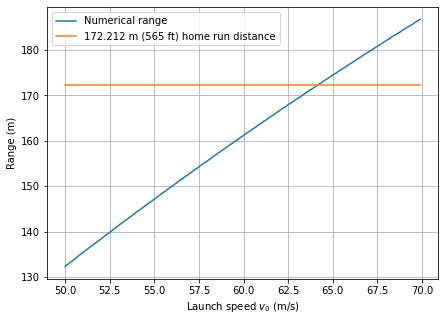

In [9]:
alpha = bestalpha
x0 = 0 # inital x
z0 = 0 # inital z
dt = 0.005 # time interval in s, had to be reduced to eliminate jaggedness in plot
tf = 15
gamma = 0.0055

# test lanuch speeds from 50 to 70 m/s in incriments of 0.25 m/s
v0l = 50
v0h = 70
deltav0 = 0.1
v0s = np.arange(v0l,v0h,deltav0)
                
# flightrange array for holding the flight range
flightrange = np.zeros(len(v0s))

# create arrays for position and velocity in x and z
t = np.arange(0,tf,dt)
x = np.zeros((len(t),2))
v = np.zeros((len(t),2))

#set inital position
x[0,0] = x0
x[0,1] = z0

# arrays for anylitical solution
xa = np.zeros(len(t))
za = np.zeros(len(t))

for j in range(len(v0s)):
    # get inital x and z velocity from launch speed and angle
    vx0 = v0s[j]*np.cos(alpha)
    vz0 = v0s[j]*np.sin(alpha)

    # update inital velocity
    v[0,0] = vx0
    v[0,1] = vz0

    # numerical for loop
    for i in range(len(t) -1):
        x[i + 1,:], v[i + 1,:] = rk2(accquaddrag, x[i,:], v[i,:], t[i], dt)

        if x[i + 1,1] < 0:
            i = i + 1 # update i for getting flight time, range, and to use for plots
            flightrange[j] = x[i,0]
            break

# get slowest launch speed for reaching 172 m
bestlaunch = v0s[np.where(flightrange >= d)][0]

print("The slowest launch speed for the baseball to reach", round(d, 3), "m is", round(bestlaunch, 3),"m/s.")     
PhysPlot.multiplot(v0s,[flightrange, d*np.ones(len(v0s))], ["Numerical range", "172.212 m (565 ft) home run distance"], "Launch speed $v_0$ (m/s)", "Range (m)")

In [10]:
# use conversion factor 1 m/s = 2.2369362920544 MPH to get amnerican units
print("The minimum lauch speed to reach 565 ft is", round(bestlaunch*2.2369362920544,3),"MPH")

The minimum lauch speed to reach 565 ft is 143.611 MPH


**Obs**: The method described in parts (B) and (C) for finding the minimum required speed is a simplification of the problem. In truth, the optimal launch angle $\theta$ varies with the launch speed $v_0$. A full solution would require solvinf for the range in a grid for various combinations of $\theta$ and $v_0$. That said, the optimal angle $\theta$ varies slowly with $v_0$ for the ranges we are considering, and our approximate method is good enough.